In [119]:
import pandas as pd
import math
import numpy as np
import quandl
import sklearn 
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [120]:
df = quandl.get('WIKI/GOOGL')
df = df[['Adj. Open','Adj. High','Adj. Close','Adj. Volume',]]
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])*100/df['Adj. Close']
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])*100/df['Adj. Open']
df= df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


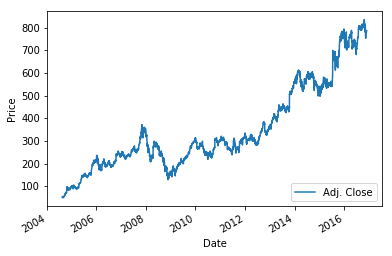

0.9655396761588837


In [130]:
forecast_col ='Adj. Close'
df.fillna(-99999,inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
df['label']= df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)

x = np.array(df.drop(['label'],1))
y = np.array(df['label'])

x = preprocessing.scale(x)
y = np.array(df['label'])

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2)
df['Adj. Close'].plot()

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

clf = LinearRegression()
clf.fit(x_train, y_train)
accuracy = clf.score(x_test,y_test)
print(accuracy)